In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('titanic.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data['Age'].fillna(data['Age'].median(),inplace=True)

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,34.952574,0.445545,0.440594,76.103301
std,249.704228,0.473732,0.528205,15.054584,0.630490,0.732294,74.759941
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,25.000000,0.000000,0.000000,28.959375
50%,457.500000,1.000000,1.000000,33.500000,0.000000,0.000000,55.000000
75%,681.500000,1.000000,1.000000,46.750000,1.000000,1.000000,89.776050
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [10]:
data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,202,202,202,202,202
unique,202,2,141,146,3
top,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,113760,B96 B98,S
freq,1,107,4,4,129


1    134
0     68
Name: Survived, dtype: int64


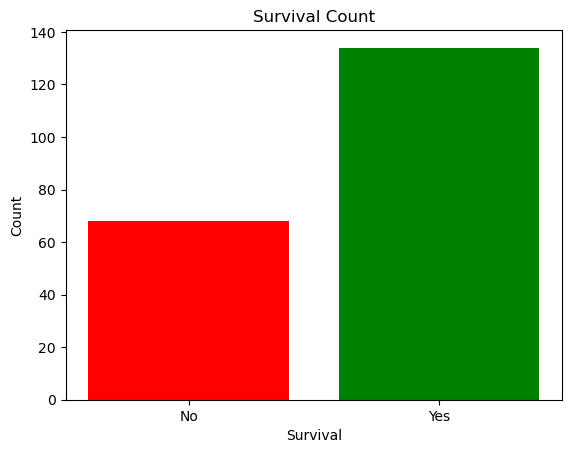

In [11]:
survival_count=data['Survived'].value_counts()
print(survival_count)
plt.bar(survival_count.index,survival_count.values,color=['green','red'])
plt.xlabel('Survival')
plt.ylabel('Count')
plt.xticks([0,1],['No','Yes'])
plt.title('Survival Count')
plt.show()

Survived   0    1
Pclass           
1         59  115
2          3   13
3          6    6


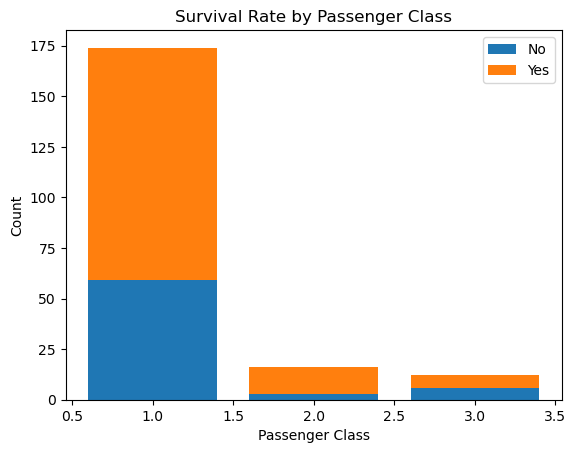

In [12]:
pclass_survival_count = data.groupby('Pclass')['Survived'].value_counts().unstack()
print(pclass_survival_count)

plt.bar(pclass_survival_count.index, pclass_survival_count[0], label='No')
plt.bar(pclass_survival_count.index, pclass_survival_count[1], bottom=pclass_survival_count[0], label='Yes')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Rate by Passenger Class')
plt.legend()
plt.show()

Survived   0   1
Sex             
female     6  89
male      62  45


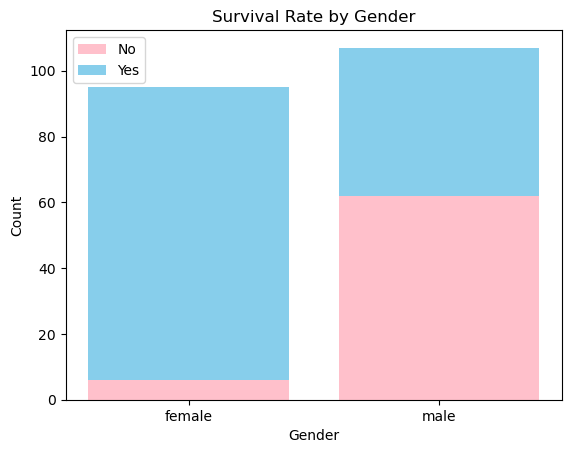

In [13]:
gender_survival_count = data.groupby('Sex')['Survived'].value_counts().unstack()
print(gender_survival_count)

plt.bar(gender_survival_count.index, gender_survival_count[0], label='No',color='pink')
plt.bar(gender_survival_count.index, gender_survival_count[1], bottom=gender_survival_count[0], label='Yes',color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival Rate by Gender')
plt.legend()
plt.show()

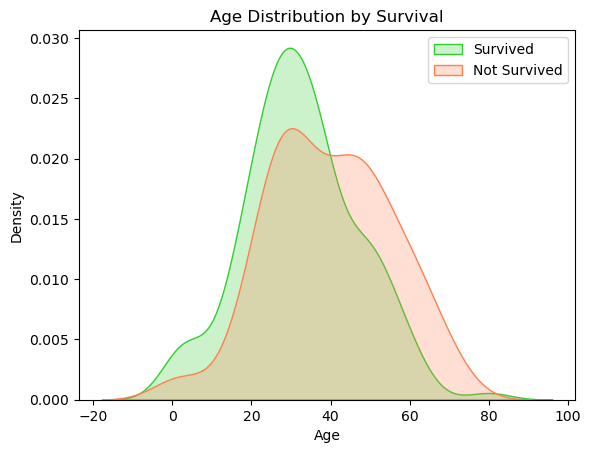

In [14]:
sns.kdeplot(data[data['Survived'] == 1]['Age'], fill=True, color='limegreen', label='Survived')
sns.kdeplot(data[data['Survived'] == 0]['Age'], fill=True, color='coral', label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()